## Download SPQ from GitHub

In [1]:
!git clone -q https://github.com/ketakopter/spq.git
%cd -q spq

In [2]:
pip install -q .

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Load modules

In [3]:
# from spq.spq.aero import *, if you want everything available for interactive work
from spq.spq.aero import Dist, Temp, Area

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

## Start playing :-)

The most basic stuff: converting scalars.

In [5]:
a = Dist(34)
print(a)
print(a.km)
print(a.ft)

34.0
0.034
111.54855643044618


In [6]:
b = Dist.fromft(15000)
print(b.m)
print(b.ft)

4572.0
14999.999999999998


We can also work with numpy arrays.

In [7]:
c = Dist.fromft(np.arange(0, 31000, 10000))
print(c)
print(c.m)
print(c.ft)

[0.0 3048.0 6096.0 9144.0]
[   0. 3048. 6096. 9144.]
[    0. 10000. 20000. 30000.]


In [8]:
d = Dist.fromkm([30, 50, 75])
print(tabulate(np.array([d.km, d.nm, d.mi]).transpose(), headers=['km', 'nm', 'mi']))

  km       nm       mi
----  -------  -------
  30  16.1987  18.6411
  50  26.9978  31.0686
  75  40.4968  46.6028


In [9]:
e_n = np.linspace(100, 1200, 12).reshape(4,3)
e = Dist(e_n)
print(e)
print(e.km)

[[100.0 200.0 300.0]
 [400.0 500.0 600.0]
 [700.0 800.0 900.0]
 [1000.0 1100.0 1200.0]]
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]
 [1.  1.1 1.2]]


We can use the numpy filtering functionalities.

In [10]:
f = Dist.fromft(np.arange(1, 10))
print(f.m)
print(f[f > 1])
print(f[f.ft > 2])
print(f[f.ft > 2].ft)
print(f[f > Dist.fromft(2)].ft)

[0.3048 0.6096 0.9144 1.2192 1.524  1.8288 2.1336 2.4384 2.7432]
[1.2192 1.524 1.8288000000000002 2.1336 2.4384 2.7432000000000003]
[0.9144000000000001 1.2192 1.524 1.8288000000000002 2.1336 2.4384
 2.7432000000000003]
[3. 4. 5. 6. 7. 8. 9.]
[3. 4. 5. 6. 7. 8. 9.]


The individual elements also have the unit attributes.

In [11]:
g = Dist.fromft(np.arange(1,10))
g_e = g[3]
print(g_e)
print(g_e.ft)

1.2192
3.9999999999999996


The numpy functions work with Pqs.

In [12]:
h = Dist(np.arange(1,10))
print(h)
print(np.sqrt(h))
print(h.km)
print(np.exp(h.km))

[1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0]
[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.        ]
[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009]
[1.0010005  1.002002   1.0030045  1.00400801 1.00501252 1.00601804
 1.00702456 1.00803209 1.00904062]


Numpy broadcasting also works.

In [13]:
i = Dist([[3,4],[8,9]])
j = np.array([4,5])
print(i*j)

[[12. 20.]
 [32. 45.]]


The main idea is to perform calculations without caring about the input and output units. For example, if the SPQ package was loaded with SI main units, and the computations are done in SI units, everything will work as expected.

In [14]:
def IsaTemp(h):
  """
  Usual atmospheric temperature, dependent on altitude.
  All quantities are expected to be in SI units.
  """
  if h < 11000.0:
    return 288.15 - 6.5 * h / 1000.
  else:
    return 216.65

In [15]:
h = Dist.fromft(10000)
t = IsaTemp(h)
t = Temp(t)
print(t.k)
print(t.c)
print(t.f)

268.33799999999997
-4.812000000000012
23.33839999999998


Plotting works too.

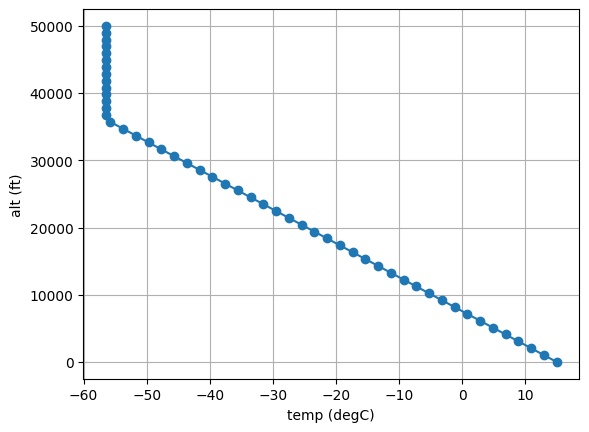

In [16]:
h = Dist.fromft(np.linspace(0, 50000, 50))
t = Temp([IsaTemp(h_) for h_ in h]) # Could have been more compact if IsaTemp was coded in a numpy-friendly way.

plt.plot(t.c, h.ft, '-o')
plt.xlabel('temp (degC)')
plt.ylabel('alt (ft)')
plt.grid()

SPQ does **not** handle operations between physical quantities. The computations work, but they don't result in some derived quantity. It is also not the intention of the module. You can always specify the resulting physical quantity.

In [17]:
l = Dist([[3,4],[8,9]])
m = Dist([4,5])
n = l*m

print(n)
print()

try:
  print(n.sqm)
except AttributeError as err:
  print(err)
  print()

n = Area(n)
print(n.sqm)
print(n.sqft)

[[12. 20.]
 [32. 45.]]

'numpy.ndarray' object has no attribute 'sqm'

[[12. 20.]
 [32. 45.]]
[[129.16692539 215.27820899]
 [344.44513438 484.37597022]]
